In [1]:
!nvidia-smi

Mon Oct 28 18:00:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
#get current working directory
import os
Home = os.getcwd()
print(Home)

/content


In [7]:
#!pip install ultralytics
import ultralytics

In [8]:
from ultralytics import YOLO
from IPython.display import display, Image

In [11]:
# get the dataset from the roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="y5JHwcyC9mYnyQjD9KJ4")
project = rf.workspace("tennis-ai").project("football-boxes")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 3751.32it/s]


In [12]:
!pwd

/content


In [19]:
#nano version
%cd {Home}
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 6.74M/6.74M [00:00<00:00, 123MB/s]
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/football-boxes-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [22]:
%ls {Home}/runs/segment/train/

args.yaml                                            labels.jpg        train_batch2.jpg
BoxF1_curve.png                                      MaskF1_curve.png  train_batch540.jpg
BoxP_curve.png                                       MaskP_curve.png   train_batch541.jpg
BoxPR_curve.png                                      MaskPR_curve.png  train_batch542.jpg
BoxR_curve.png                                       MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png                      results.csv       val_batch0_pred.jpg
confusion_matrix.png                                 results.png       val_batch1_labels.jpg
events.out.tfevents.1730140917.26a241084a3a.10956.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg                               train_batch1.jpg  weights/


/content


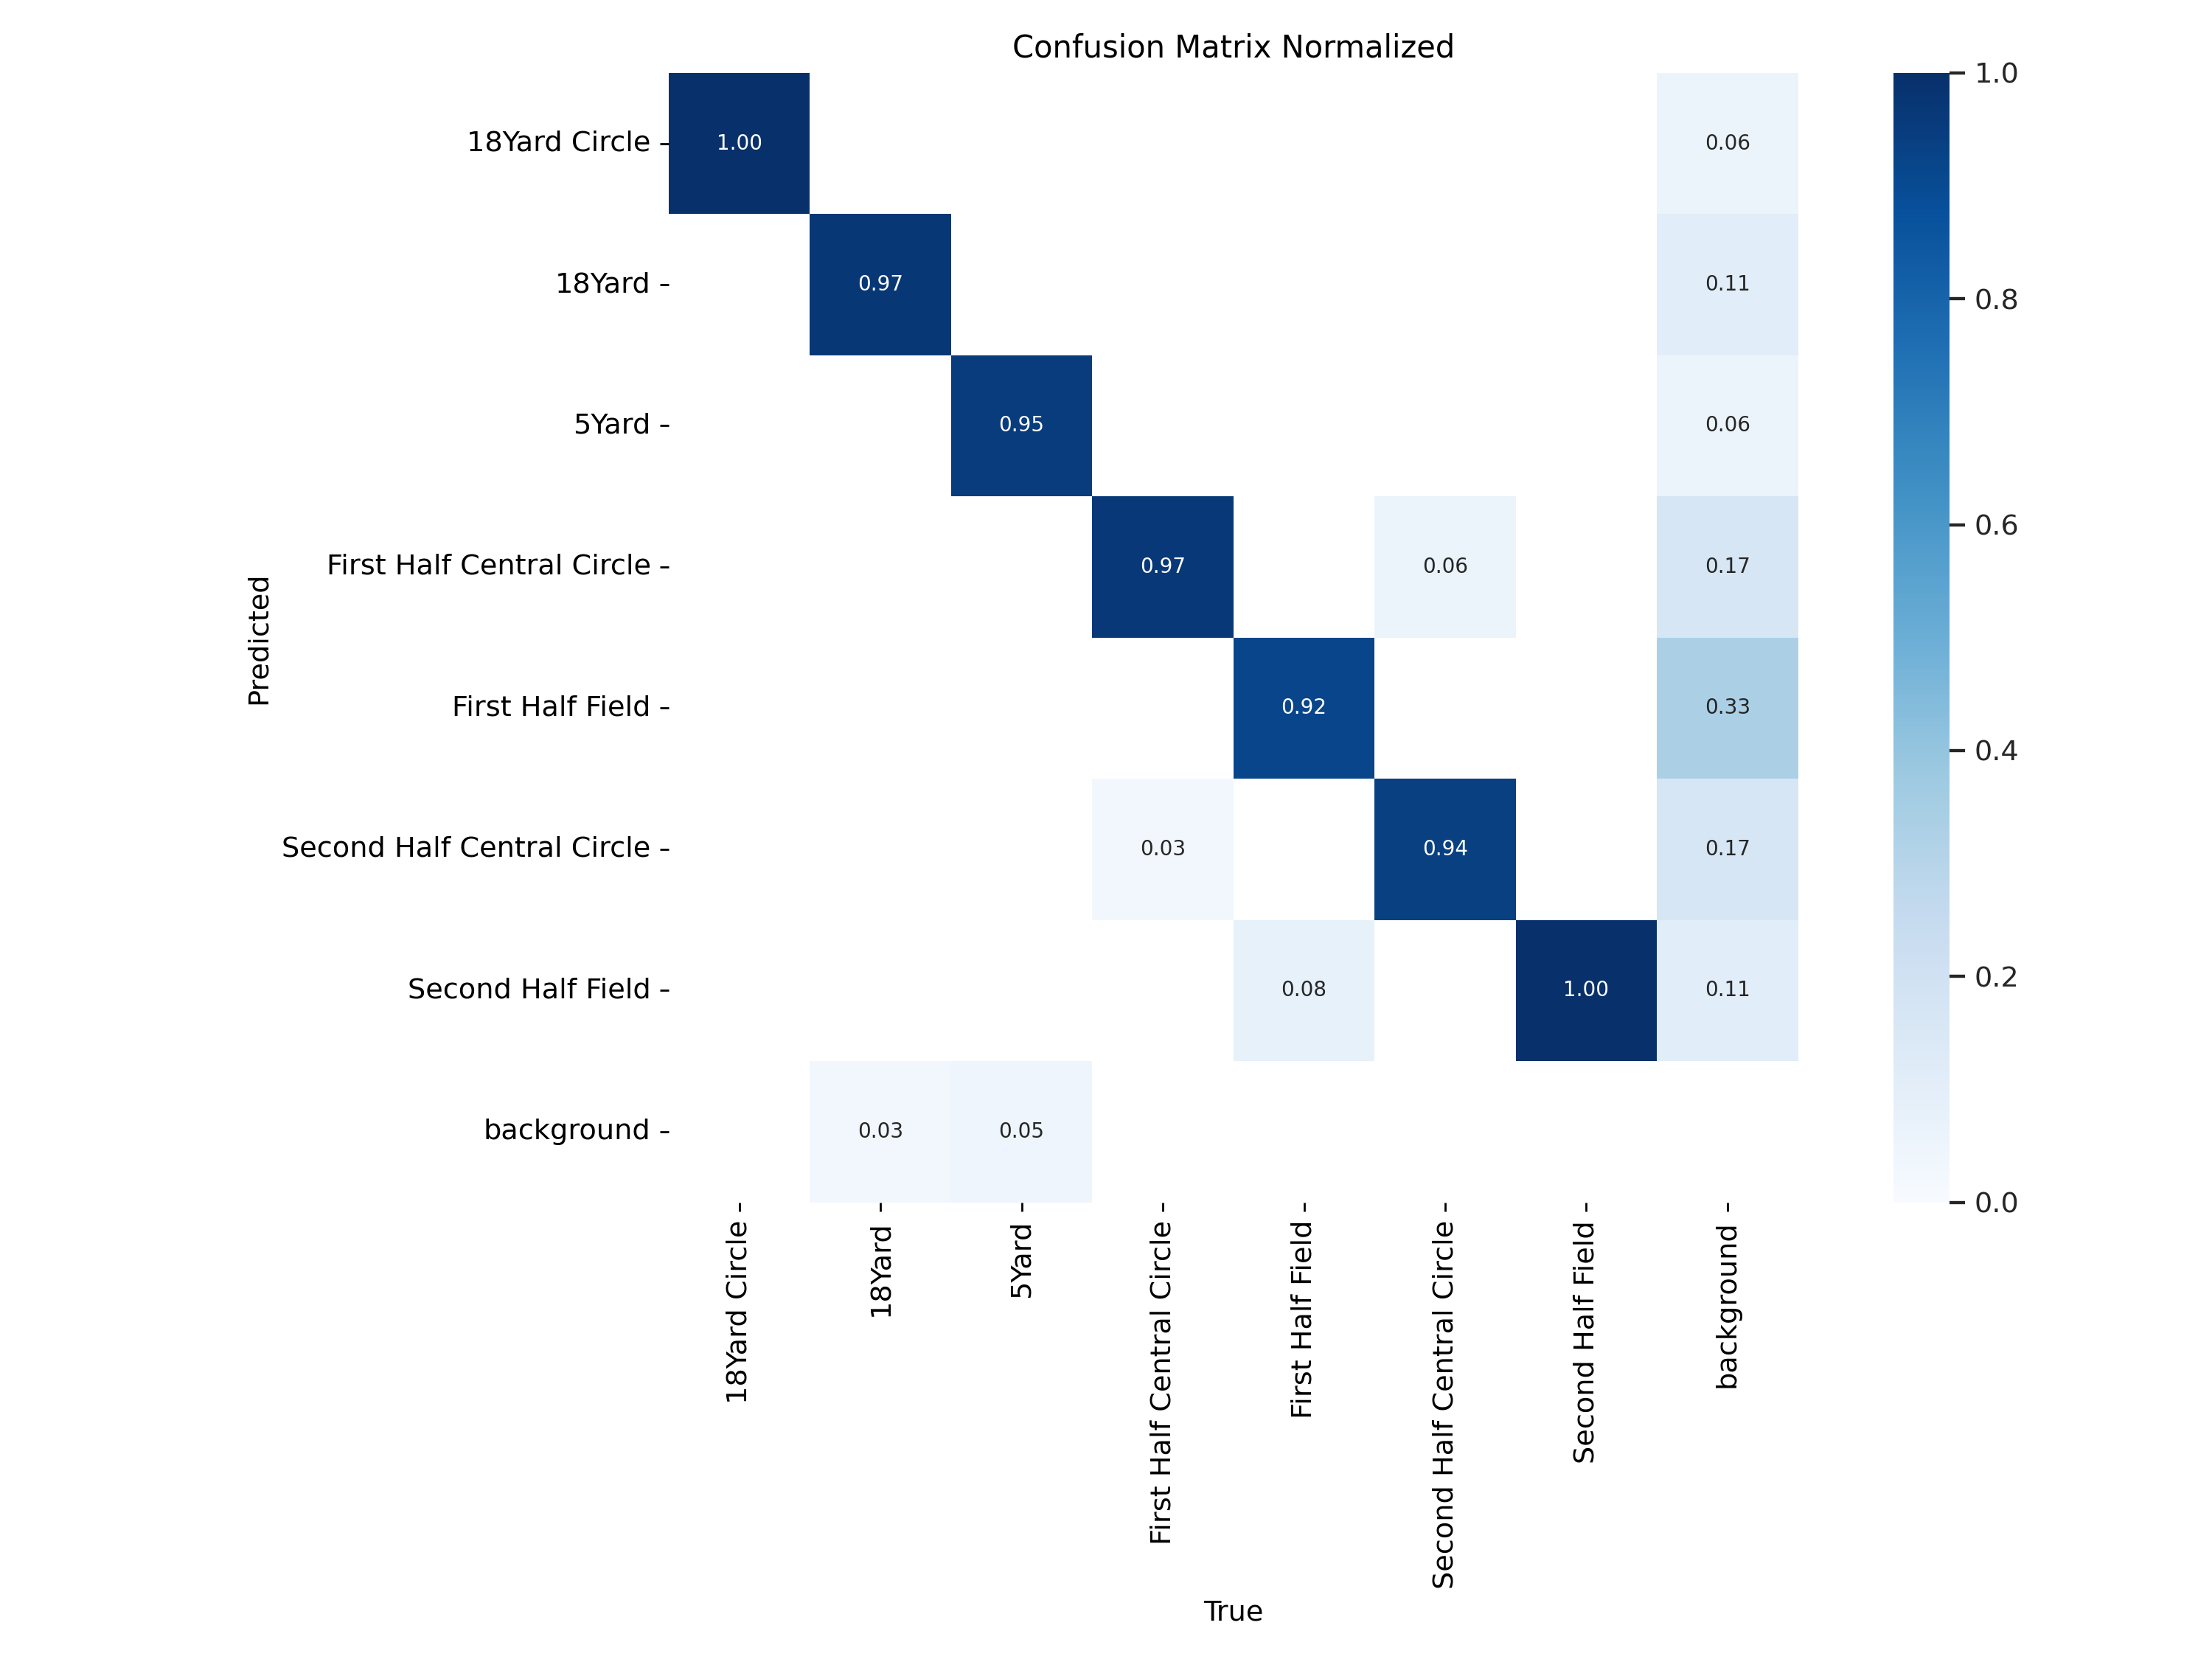

In [30]:
%cd {Home}
Image(filename=f'{Home}/runs/segment/train/confusion_matrix_normalized.png' , width=1000)

/content


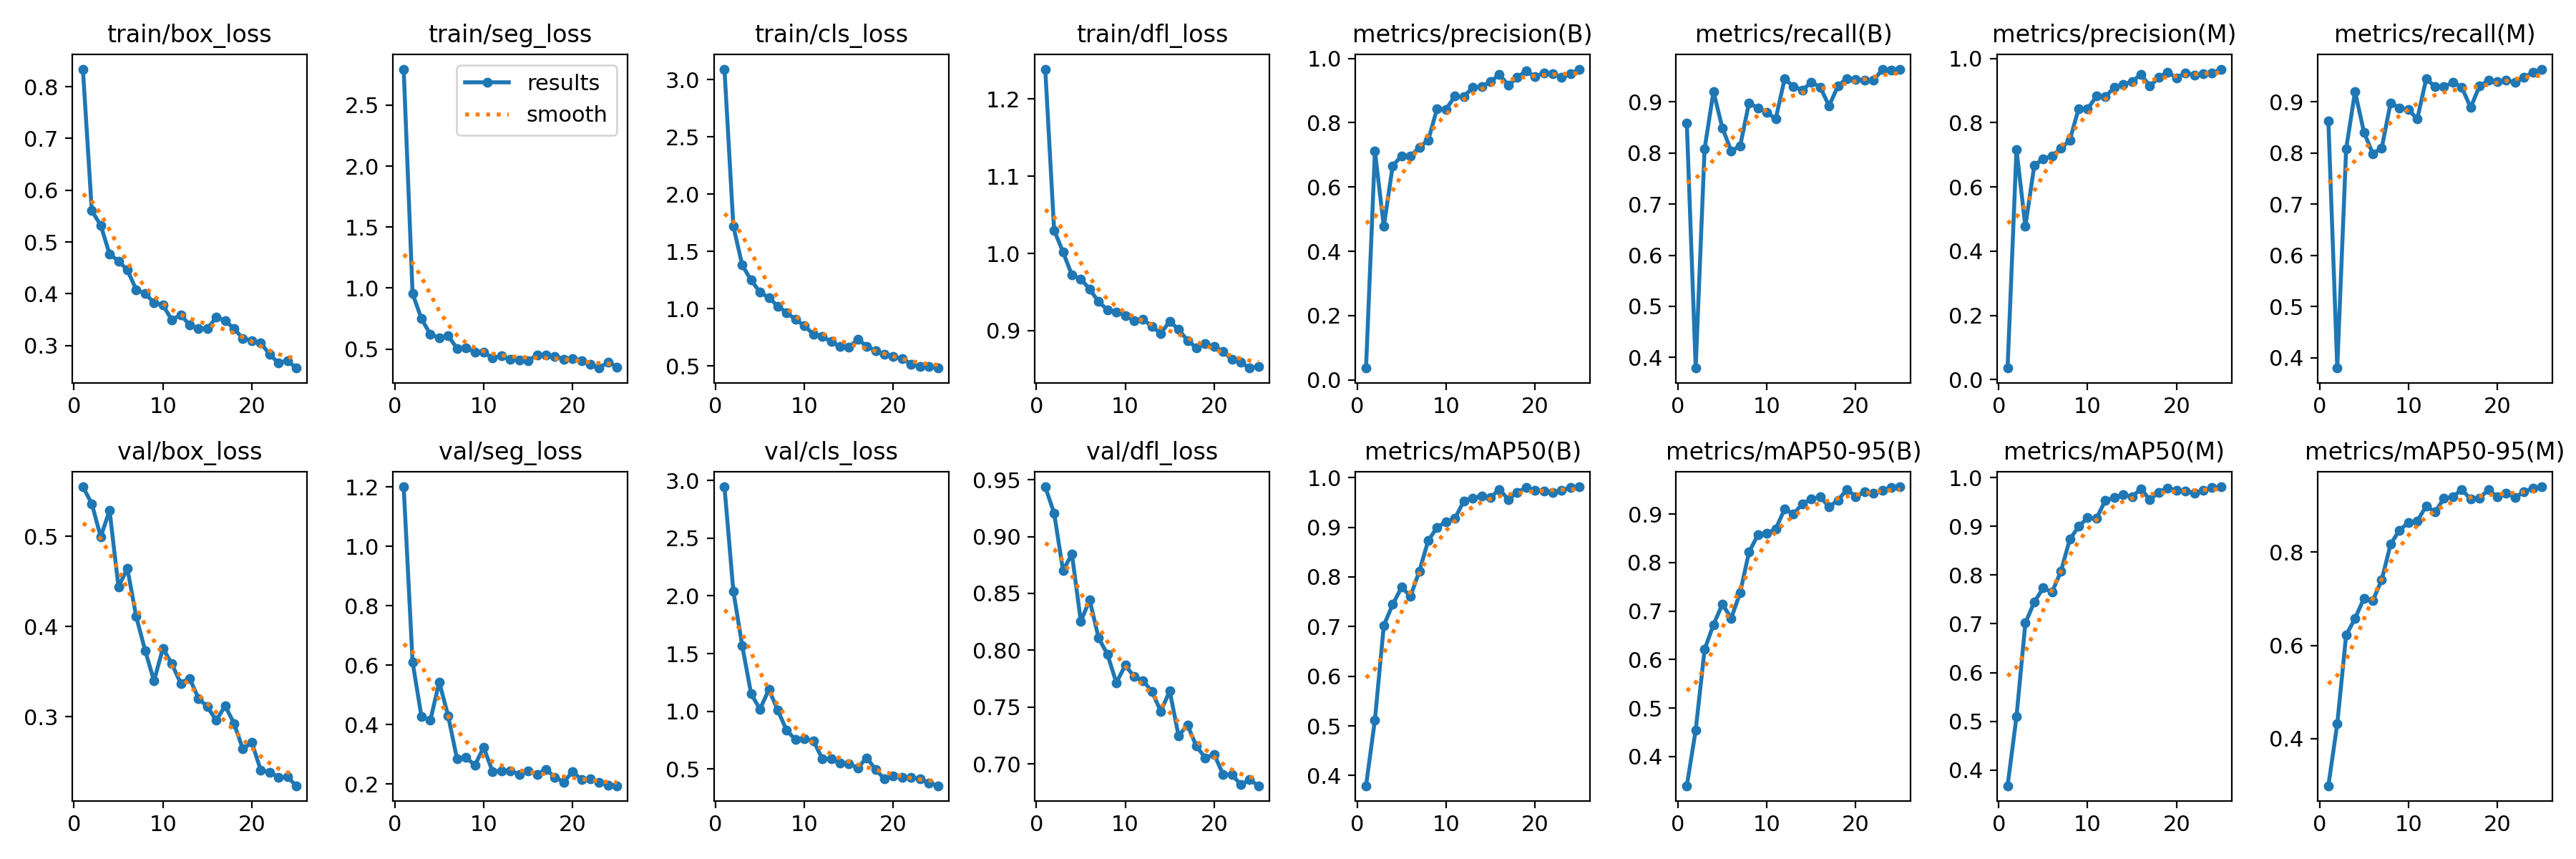

In [29]:
%cd {Home}
Image(filename=f'{Home}/runs/segment/train/results.png' , width=1000)